Explained Variance Ratio: [0.7470533  0.18435257 0.04682624]


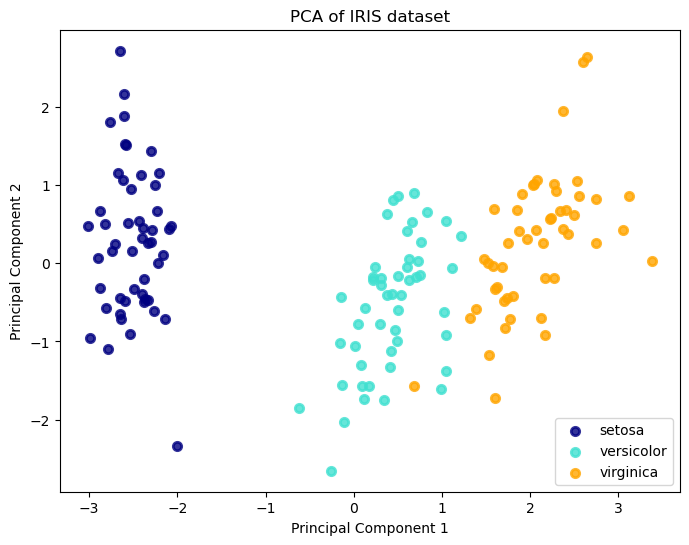

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
df = pd.read_csv("iris_dataset.csv")

# Encode categorical target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])

# Split data into features and target variable
X = df.drop(columns=["Species"])
y = df["Species"]

# Standardize the features
X_std = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_std)

# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Plot the results
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'orange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


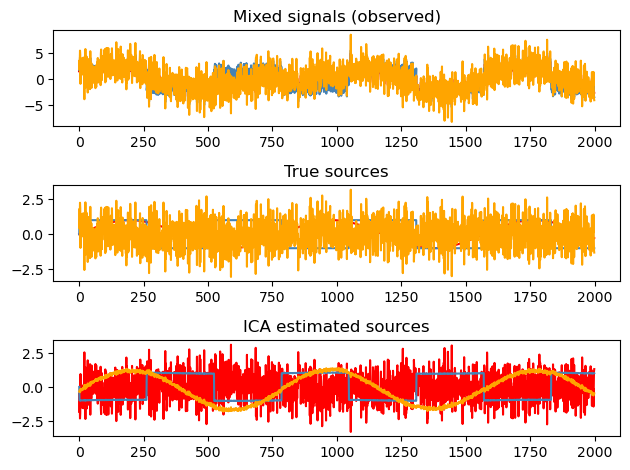

In [12]:
from sklearn.decomposition import FastICA
import numpy as np

# Generate synthetic data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)   # Source 1: sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Source 2: square signal
s3 = np.random.randn(n_samples)  # Source 3: Gaussian noise

S = np.c_[s1, s2, s3]  # Combine the sources into a matrix

# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Mixed signals

# Perform ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct independent components

# Plot the results
import matplotlib.pyplot as plt

plt.figure()

models = [X, S, S_]
names = ['Mixed signals (observed)', 'True sources', 'ICA estimated sources']
colors = ['red', 'steelblue', 'orange']

for i, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(3, 1, i)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()
